<h1 align=center><font size = 5>Battle of the Neighborhoods</font></h1>

## Intorduction

- Client/Stake Holders: ACME Co. is an international precious stones and metals investment firm which has jewelry stores in various countries selling jewelries from low grade to the highest of unique gems.

- Overall Business Goal: Due to improved economic conditions, ACME Co. has decided to establish one or two jewelry stores providing not only highest quality and grade of jewelries but also provide services such as creating custom jewelry dependent on high net-worth clients’ tastes and requests.

- Detailed Business Goal: Los Angeles county is culturally diverse, close to international shipping routs (Long Beach shipyards), center for some of the most famous fashion industries and large number of high net-worth individuals. Due to the facts above, ACME has decided to open high-end jewelry stores in Los Angeles county. Because of this they need to find the best LA city/cities to open one or two exclusive jewelry stores. This would also provide an opportunity for ACME Co. to introduce and build a brand for itself among the high net-worth communities.


## Ideas / Solutions

- Ideas: So the questions that comes to mind are where are the best Los Angeles county areas to provide jewelry services to high net-worth individuals? What is the best way to find these individuals and have them visit our store(s)? How can we find high net-worth individuals?

- Solution: In my opinion the best answer is not to focus on such individuals because they could be spread out through out Los Angeles. In some areas more and in some areas with less density. Additionally, some could also leave in middle class areas. So instead of focusing on distinguished clientele, we will focus on properties which such individuals own and reside in, specifically their homes. In conclusion, we will be focusing on Los Angeles zip codes that have the highest >average< house values. 

- Solution in Detail: So should we just find the first zip code with the highest average house price, and put up our jewelry store there? The answer is NO, because some expensive zones could be mostly residential, or the zones might not have the right type business environment or the zones/centers might not be the right type for jewelry store foot traffic. So we will grab the top 10 zip codes with the highest average house prices and cluster them into three groups (k-clusters) and then evaluate each group by the type of popular venues/businesses nearby.




## Data Resources / Research

- Resources / Data: Our analysis will be based on several types of resources and data:

   - 1 a) Description: A list of all Los Angeles county zip codes, names and geo positions   
   - 1 b) Resource:   https://simplemaps.com/data/us-zips
   >
   - 2 a) Description: A ist of all Los Angeles county zip codes and their average “single family” home values
   - 2 b) Reesource:   https://www.zillow.com/los-angeles-county-ca/home-values/
   >
   - 3 a) Description: Top five venues for each of the "top ten zipcodes" above
   - 3 b) Resource:    https://www.Foursquare.com


### Import Libraries

In [2]:
import pandas as pd

import numpy as np

import requests as requests

# Matplotlib 
import matplotlib as mpl
import matplotlib.pyplot as plt
#associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')


Libraries imported.


In [3]:
df_zip_info = pd.read_csv('uszips.csv')

Resource: https://simplemaps.com/data/us-zips
The file containing whole U.S. Zipcode information such as Latitude, Longitude, city name is "uszips.csv"
Since this file had to be manually downloaded, I cleaned it up ahead of time and copied it hear localy.
Much easier to configure data in excel than Pandas!

File containing Zipcode information in Los Angesles county ...

In [4]:
df_zip_info.head()

,Zipcode,Latitude,Longitude,City_Name,Zip_City
0,90001,33.9740,-118.2495,Los Angeles,90001-Los Angeles
1,90002,33.9491,-118.2467,Los Angeles,90002-Los Angeles
2,90003,33.9641,-118.2737,Los Angeles,90003-Los Angeles
3,90004,34.0762,-118.3108,Los Angeles,90004-Los Angeles
4,90005,34.0591,-118.3064,Los Angeles,90005-Los Angeles


Resource: https://www.zillow.com/los-angeles-county-ca/home-values/. The file "Home_Prices_By_Zip.csv" contains all average home prices in Los Angeles county by zipcodes. Since I had to download it manually, I cleaned it up in excel before bringing it in here.

In [5]:
df_zip_prices = pd.read_csv('Home_Prices_By_Zip.csv')
df_zip_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 2 columns):
Zipcode      269 non-null int64
Avg_Price    269 non-null int64
dtypes: int64(2)
memory usage: 4.3 KB


In [6]:
#df_zip_prices["Avg_Price"] = df_zip_prices["Avg_Price"].astype(dtype=np.int64)
df_zip_prices.head()

,Zipcode,Avg_Price
0,90001,378200
1,90002,376500
2,90003,397600
3,90004,1576100
4,90005,1732000


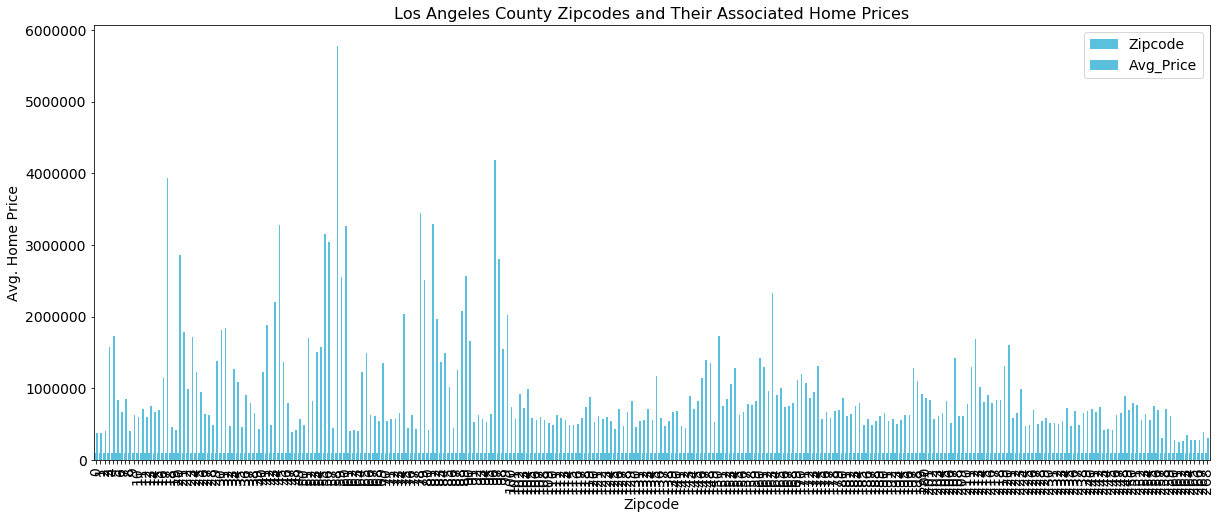

In [7]:
bar_color = ('#5bc0de')
bar_chart = df_zip_prices.plot(kind='bar', width=0.8, figsize=(20, 8), fontsize=14 , color=bar_color )
bar_chart.set_title("Los Angeles County Zipcodes and Their Associated Home Prices", fontsize=16)
bar_chart.set_xlabel("Zipcode", fontsize=14)
bar_chart.set_ylabel("Avg. Home Price", fontsize=14)
bar_chart.legend(fontsize=14)
plt.show()

#### Lets take a look at all Los Angeles county zipcodes and their home price ranges ...

### Next, lets grab the top ten zipcodes by home prices

In [8]:
df_zip_top10 = df_zip_prices.nlargest(10, 'Avg_Price')
df_zip_top10.sort_values(['Avg_Price'], ascending=False, axis=0, inplace=True)
df_zip_top10

,Zipcode,Avg_Price
58,90210,5782800
96,90402,4190600
17,90020,3937900
78,90265,3442600
81,90272,3295600
44,90049,3286300
60,90212,3265100
55,90069,3156200
56,90077,3039300
20,90024,2859000


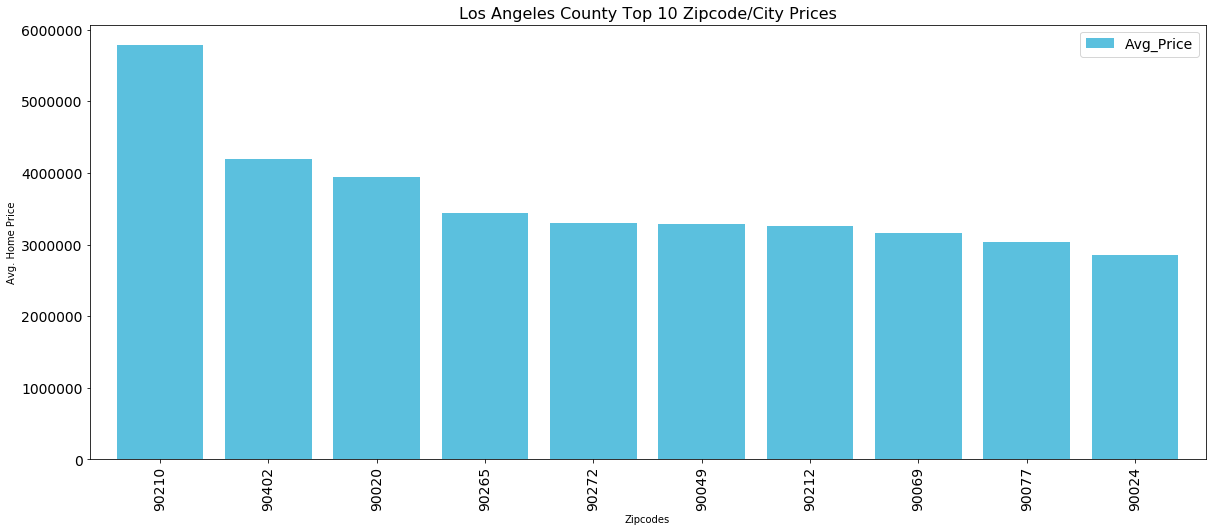

In [9]:
df_bar_top10 = df_zip_top10
#Lets remove the index column so it wouldn't show in the bar chart
df_bar_top10.set_index('Zipcode', inplace=True)
bar_color = ('#5bc0de')
bar_chart = df_bar_top10.plot(kind='bar', width=0.8, figsize=(20, 8), fontsize=14 , color=bar_color )
bar_chart.set_title("Los Angeles County Top 10 Zipcode/City Prices", fontsize=16)
bar_chart.set_xlabel("Zipcodes")
bar_chart.set_ylabel("Avg. Home Price")
bar_chart.legend(fontsize=14)
plt.show()

### Now lets combine dataframe which contains zipcode information with the dataframe which contains top10 zipcode homeprices

In [10]:
df_final_zip = pd.merge(df_zip_info, df_zip_top10, on='Zipcode')
df_final_zip

,Zipcode,Latitude,Longitude,City_Name,Zip_City,Avg_Price
0,90020,34.0664,-118.3099,Los Angeles,90020-Los Angeles,3937900
1,90024,34.0657,-118.4350,Los Angeles,90024-Los Angeles,2859000
2,90049,34.0872,-118.4893,Los Angeles,90049-Los Angeles,3286300
3,90069,34.0938,-118.3817,West Hollywood,90069-West Hollywood,3156200
4,90077,34.1055,-118.4561,Los Angeles,90077-Los Angeles,3039300
5,90210,34.1010,-118.4148,Beverly Hills,90210-Beverly Hills,5782800
6,90212,34.0622,-118.4019,Beverly Hills,90212-Beverly Hills,3265100
7,90265,34.0719,-118.8499,Malibu,90265-Malibu,3442600
8,90272,34.0799,-118.5422,Pacific Palisades,90272-Pacific Palisades,3295600
9,90402,34.0356,-118.5036,Santa Monica,90402-Santa Monica,4190600


### Next lets put up a map to show how these top 10 zipcodes are situated against each other ...
### But before we show the map, lets initialize it (center it) with a random city in our top 10 list ...

In [11]:
#Lets get Latitude and Longitude of "90069, West Hollywood"
Init_latitude = df_final_zip.loc[df_final_zip['Zipcode'] == 90069, 'Latitude'].iat[0]
Init_longitude = df_final_zip.loc[df_final_zip['Zipcode'] == 90069, 'Longitude'].iat[0]
print(Init_latitude)
print(Init_longitude)

34.0938
-118.3817


In [12]:
# create map of Los Angeles county using latitude and longitude values
map_LosAngeles = folium.Map(location=[Init_latitude, Init_longitude], zoom_start=10)

# add neighborhood/markers to map
for lat, lng, Zip_City in zip(df_final_zip['Latitude'], df_final_zip['Longitude'], df_final_zip['Zip_City']):
    label = '{}'.format(Zip_City)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_LosAngeles)  
    
map_LosAngeles

<a href="https://github.com/dtoufer/Coursera_Capstone/blob/master/Map%231.PNG">If map not visible, click here to see map!</a>

### Next lets explore each zipcode/city top 5 venues using Foursquare API ...
### Note: Judging by how zipcodes are situated against each other on the map, its best to focus on top 5 venues that are no further than 2 kilometers away!

In [13]:
CLIENT_ID = 'CITQUKHYRNH24TDRB3E5FWK03UFKVSIEWLLX5R2DV1Q5G3JT' # your Foursquare ID
CLIENT_SECRET = 'TOEXJBCWJHPXLK5EFKMEBKX5FBOMOLZPGEHJ3CULSPYM03WE' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CITQUKHYRNH24TDRB3E5FWK03UFKVSIEWLLX5R2DV1Q5G3JT
CLIENT_SECRET:TOEXJBCWJHPXLK5EFKMEBKX5FBOMOLZPGEHJ3CULSPYM03WE


In [15]:
#Lets repeat the same process for all neighborhoods in North York
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Zip_City', 
                  'Zip_City Latitude', 
                  'Zip_City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
#Lets get the top 5 venues within the 2 kilometer radius
LIMIT = 5 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius

In [17]:
#Call the function for each of the top 10 Zipcodes in Los Angeles county in to a new dataframe
LosAngeles_venues = getNearbyVenues(names=df_final_zip['Zip_City'],
                                   latitudes=df_final_zip['Latitude'],
                                   longitudes=df_final_zip['Longitude']
                                  )

90020-Los Angeles
90024-Los Angeles
90049-Los Angeles
90069-West Hollywood
90077-Los Angeles
90210-Beverly Hills
90212-Beverly Hills
90265-Malibu
90272-Pacific Palisades
90402-Santa Monica


In [18]:
print(LosAngeles_venues.shape)
LosAngeles_venues

(45, 7)


,Zip_City,Zip_City Latitude,Zip_City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,90020-Los Angeles,34.0664,-118.3099,Han Bat Sul Lung Tang,34.065474,-118.309471,Korean Restaurant
1,90020-Los Angeles,34.0664,-118.3099,Here's Looking at You,34.063635,-118.307999,New American Restaurant
2,90020-Los Angeles,34.0664,-118.3099,Jun Won,34.066871,-118.308867,Korean Restaurant
3,90020-Los Angeles,34.0664,-118.3099,Monty’s Good Burger,34.064797,-118.309034,Burger Joint
4,90020-Los Angeles,34.0664,-118.3099,Beer Belly,34.064302,-118.308763,Bar
5,90024-Los Angeles,34.0657,-118.4350,UCLA Mildred E. Mathias Botanical Garden,34.064753,-118.440427,Garden
6,90024-Los Angeles,34.0657,-118.4350,Wilshire Margot Luxury Apartments,34.061865,-118.433834,Residential Building (Apartment / Condo)
7,90024-Los Angeles,34.0657,-118.4350,iPic Theatres,34.059093,-118.441475,Movie Theater
8,90024-Los Angeles,34.0657,-118.4350,Beverly Hills Plaza Hotel & Spa,34.067635,-118.426062,Hotel
9,90024-Los Angeles,34.0657,-118.4350,Geffen Playhouse,34.063626,-118.444523,College Theater


In [19]:
LosAngeles_venues.groupby('Zip_City').count()

,Zip_City Latitude,Zip_City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Zip_City,,,,,,
90020-Los Angeles,5,5,5,5,5,5
90024-Los Angeles,5,5,5,5,5,5
90049-Los Angeles,5,5,5,5,5,5
90069-West Hollywood,5,5,5,5,5,5
90077-Los Angeles,5,5,5,5,5,5
90210-Beverly Hills,5,5,5,5,5,5
90212-Beverly Hills,5,5,5,5,5,5
90272-Pacific Palisades,5,5,5,5,5,5
90402-Santa Monica,5,5,5,5,5,5


In [20]:
print('There are {} uniques categories.'.format(len(LosAngeles_venues['Venue Category'].unique())))

There are 34 uniques categories.


## Very Interesting !!!
### If we pay special attention, we see here that one of the top zipcodes is missing. I.E. Foursquare did NOT have any venues for one of our zipcodes.
### It seems that "90265-Malibu" does not have any venues. Most probably its either all residential area or there are no commercial zones near by.
### We will keep this in mind because when time comes for clustering cities, we will need to remove "90265-Malibu" from our analysis.

In [21]:
# one hot encoding
LosAngeles_onehot = pd.get_dummies(LosAngeles_venues[['Venue Category']], prefix="", prefix_sep="")

# add Zip_City column back to dataframe
LosAngeles_onehot['Zip_City'] = LosAngeles_venues['Zip_City'] 

# move Zip_City column to the first column
fixed_columns = [LosAngeles_onehot.columns[-1]] + list(LosAngeles_onehot.columns[:-1])
LosAngeles_onehot = LosAngeles_onehot[fixed_columns]

LosAngeles_onehot.head()

,Zip_City,American Restaurant,Art Museum,Bar,Beach,Boutique,Building,Burger Joint,Café,College Theater,...,Nightlife Spot,Other Great Outdoors,Park,Residential Building (Apartment / Condo),Road,Scenic Lookout,Steakhouse,Sushi Restaurant,Trail,Yoga Studio
0,90020-Los Angeles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90020-Los Angeles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,90020-Los Angeles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,90020-Los Angeles,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,90020-Los Angeles,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Convert Categorical values into dummy/indicator values

In [22]:
LosAngeles_onehot.shape

(45, 35)

In [23]:
#Next, let's group rows by Zip_City and by taking the mean of the frequency of occurrence of each category
LosAngeles_grouped = LosAngeles_onehot.groupby('Zip_City').mean().reset_index()
LosAngeles_grouped

,Zip_City,American Restaurant,Art Museum,Bar,Beach,Boutique,Building,Burger Joint,Café,College Theater,...,Nightlife Spot,Other Great Outdoors,Park,Residential Building (Apartment / Condo),Road,Scenic Lookout,Steakhouse,Sushi Restaurant,Trail,Yoga Studio
0,90020-Los Angeles,0.0,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,90024-Los Angeles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,...,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
2,90049-Los Angeles,0.0,0.4,0.0,0.0,0.0,0.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,90069-West Hollywood,0.2,0.0,0.0,0.0,0.2,0.0,0.0,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0
4,90077-Los Angeles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0
5,90210-Beverly Hills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.2,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,90212-Beverly Hills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0
7,90272-Pacific Palisades,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.4,0.0
8,90402-Santa Monica,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2


In [26]:
#Let's print each Zip_City along with the top 5 most common venues
num_top_venues = 5

for hood in LosAngeles_grouped['Zip_City']:
    print("----"+hood+"----")
    temp = LosAngeles_grouped[LosAngeles_grouped['Zip_City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))

----90020-Los Angeles----
                     venue  freq
0        Korean Restaurant   0.4
1                      Bar   0.2
2             Burger Joint   0.2
3  New American Restaurant   0.2
4                     Park   0.0
----90024-Los Angeles----
                                      venue  freq
0                                    Garden   0.2
1                             Movie Theater   0.2
2                                     Hotel   0.2
3  Residential Building (Apartment / Condo)   0.2
4                           College Theater   0.2
----90049-Los Angeles----
                      venue  freq
0                Art Museum   0.4
1                    Garden   0.4
2                  Building   0.2
3  Mediterranean Restaurant   0.0
4        Mexican Restaurant   0.0
----90069-West Hollywood----
                 venue  freq
0  American Restaurant   0.2
1     Sushi Restaurant   0.2
2             Boutique   0.2
3   Mexican Restaurant   0.2
4                 Café   0.2
----90077-Los Ang

In [28]:
#Now let's create the new dataframe and display the top 5 venues for each Zip_City.
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Zip_City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Zip_City_venues_sorted = pd.DataFrame(columns=columns)
Zip_City_venues_sorted['Zip_City'] = LosAngeles_grouped['Zip_City']

for ind in np.arange(LosAngeles_grouped.shape[0]):
    Zip_City_venues_sorted.iloc[ind, 1:] = return_most_common_venues(LosAngeles_grouped.iloc[ind, :], num_top_venues)

Zip_City_venues_sorted

,Zip_City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,90020-Los Angeles,Korean Restaurant,New American Restaurant,Bar,Burger Joint,Yoga Studio
1,90024-Los Angeles,Hotel,College Theater,Garden,Residential Building (Apartment / Condo),Movie Theater
2,90049-Los Angeles,Art Museum,Garden,Building,Yoga Studio,Food Truck
3,90069-West Hollywood,American Restaurant,Boutique,Mexican Restaurant,Café,Sushi Restaurant
4,90077-Los Angeles,Grocery Store,Indian Restaurant,Road,Café,Historic Site
5,90210-Beverly Hills,Park,Historic Site,Food Truck,Other Great Outdoors,Yoga Studio
6,90212-Beverly Hills,Café,Steakhouse,Jewelry Store,Mediterranean Restaurant,Hotel
7,90272-Pacific Palisades,Trail,Scenic Lookout,Gym,Nightlife Spot,Bar
8,90402-Santa Monica,Yoga Studio,Beach,Gym,Ice Cream Shop,Indie Movie Theater


In [27]:
#Lets sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Now let's create the new dataframe and display the top 5 venues for each Zip_City.

In [29]:
#Run k-means to cluster the neighborhood into 3 clusters.
# set number of clusters
kclusters = 3

LosAngeles_grouped_clustering = LosAngeles_grouped.drop('Zip_City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(LosAngeles_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 2, 0, 0, 1, 1], dtype=int32)

In [30]:
#Let's create a new dataframe that includes the cluster as well as the top 5 venues for each Zip_City
# add clustering labels
Zip_City_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)
#Zip_City_venues_sorted.head()
LosAngeles_merged = df_final_zip

# merge LosAngeles_grouped with LosAngeles_data to add latitude/longitude for each Zip_City
LosAngeles_merged = LosAngeles_merged.join(Zip_City_venues_sorted.set_index('Zip_City'), on='Zip_City')

#LosAngeles_merged['Cluster Labels'] = LosAngeles_merged['Cluster Labels'].astype(int)

LosAngeles_merged.head(20) # check the last columns!

,Zipcode,Latitude,Longitude,City_Name,Zip_City,Avg_Price,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,90020,34.0664,-118.3099,Los Angeles,90020-Los Angeles,3937900,0.0,Korean Restaurant,New American Restaurant,Bar,Burger Joint,Yoga Studio
1,90024,34.0657,-118.4350,Los Angeles,90024-Los Angeles,2859000,0.0,Hotel,College Theater,Garden,Residential Building (Apartment / Condo),Movie Theater
2,90049,34.0872,-118.4893,Los Angeles,90049-Los Angeles,3286300,0.0,Art Museum,Garden,Building,Yoga Studio,Food Truck
3,90069,34.0938,-118.3817,West Hollywood,90069-West Hollywood,3156200,0.0,American Restaurant,Boutique,Mexican Restaurant,Café,Sushi Restaurant
4,90077,34.1055,-118.4561,Los Angeles,90077-Los Angeles,3039300,2.0,Grocery Store,Indian Restaurant,Road,Café,Historic Site
5,90210,34.1010,-118.4148,Beverly Hills,90210-Beverly Hills,5782800,0.0,Park,Historic Site,Food Truck,Other Great Outdoors,Yoga Studio
6,90212,34.0622,-118.4019,Beverly Hills,90212-Beverly Hills,3265100,0.0,Café,Steakhouse,Jewelry Store,Mediterranean Restaurant,Hotel
7,90265,34.0719,-118.8499,Malibu,90265-Malibu,3442600,NaN,NaN,NaN,NaN,NaN,NaN
8,90272,34.0799,-118.5422,Pacific Palisades,90272-Pacific Palisades,3295600,1.0,Trail,Scenic Lookout,Gym,Nightlife Spot,Bar
9,90402,34.0356,-118.5036,Santa Monica,90402-Santa Monica,4190600,1.0,Yoga Studio,Beach,Gym,Ice Cream Shop,Indie Movie Theater


### Lets show the cluster assignments and top 5 venues for each zip/city ...

### As we remember earlier on, "90265-Malibu" did not have any venues, so lets delete the row so it will be excluded from mapping

In [31]:
LosAngeles_merged = LosAngeles_merged[LosAngeles_merged.Zipcode != 90265]
LosAngeles_merged.sort_values(['Cluster_Labels'], ascending=False, axis=0, inplace=True)
LosAngeles_merged = LosAngeles_merged.reset_index()
LosAngeles_merged.head(20)

,index,Zipcode,Latitude,Longitude,City_Name,Zip_City,Avg_Price,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,4,90077,34.1055,-118.4561,Los Angeles,90077-Los Angeles,3039300,2.0,Grocery Store,Indian Restaurant,Road,Café,Historic Site
1,8,90272,34.0799,-118.5422,Pacific Palisades,90272-Pacific Palisades,3295600,1.0,Trail,Scenic Lookout,Gym,Nightlife Spot,Bar
2,9,90402,34.0356,-118.5036,Santa Monica,90402-Santa Monica,4190600,1.0,Yoga Studio,Beach,Gym,Ice Cream Shop,Indie Movie Theater
3,0,90020,34.0664,-118.3099,Los Angeles,90020-Los Angeles,3937900,0.0,Korean Restaurant,New American Restaurant,Bar,Burger Joint,Yoga Studio
4,1,90024,34.0657,-118.4350,Los Angeles,90024-Los Angeles,2859000,0.0,Hotel,College Theater,Garden,Residential Building (Apartment / Condo),Movie Theater
5,2,90049,34.0872,-118.4893,Los Angeles,90049-Los Angeles,3286300,0.0,Art Museum,Garden,Building,Yoga Studio,Food Truck
6,3,90069,34.0938,-118.3817,West Hollywood,90069-West Hollywood,3156200,0.0,American Restaurant,Boutique,Mexican Restaurant,Café,Sushi Restaurant
7,5,90210,34.1010,-118.4148,Beverly Hills,90210-Beverly Hills,5782800,0.0,Park,Historic Site,Food Truck,Other Great Outdoors,Yoga Studio
8,6,90212,34.0622,-118.4019,Beverly Hills,90212-Beverly Hills,3265100,0.0,Café,Steakhouse,Jewelry Store,Mediterranean Restaurant,Hotel


### The map function does not like cluster values as floats, so lets convert the Cluster_Label values to integer

In [32]:
LosAngeles_merged['Cluster_Labels'] = LosAngeles_merged['Cluster_Labels'].astype(int)
LosAngeles_merged.head(20)

,index,Zipcode,Latitude,Longitude,City_Name,Zip_City,Avg_Price,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,4,90077,34.1055,-118.4561,Los Angeles,90077-Los Angeles,3039300,2,Grocery Store,Indian Restaurant,Road,Café,Historic Site
1,8,90272,34.0799,-118.5422,Pacific Palisades,90272-Pacific Palisades,3295600,1,Trail,Scenic Lookout,Gym,Nightlife Spot,Bar
2,9,90402,34.0356,-118.5036,Santa Monica,90402-Santa Monica,4190600,1,Yoga Studio,Beach,Gym,Ice Cream Shop,Indie Movie Theater
3,0,90020,34.0664,-118.3099,Los Angeles,90020-Los Angeles,3937900,0,Korean Restaurant,New American Restaurant,Bar,Burger Joint,Yoga Studio
4,1,90024,34.0657,-118.4350,Los Angeles,90024-Los Angeles,2859000,0,Hotel,College Theater,Garden,Residential Building (Apartment / Condo),Movie Theater
5,2,90049,34.0872,-118.4893,Los Angeles,90049-Los Angeles,3286300,0,Art Museum,Garden,Building,Yoga Studio,Food Truck
6,3,90069,34.0938,-118.3817,West Hollywood,90069-West Hollywood,3156200,0,American Restaurant,Boutique,Mexican Restaurant,Café,Sushi Restaurant
7,5,90210,34.1010,-118.4148,Beverly Hills,90210-Beverly Hills,5782800,0,Park,Historic Site,Food Truck,Other Great Outdoors,Yoga Studio
8,6,90212,34.0622,-118.4019,Beverly Hills,90212-Beverly Hills,3265100,0,Café,Steakhouse,Jewelry Store,Mediterranean Restaurant,Hotel


In [33]:
#Lets visualize the resulting clusters
# create map
map_clusters = folium.Map(location=[Init_latitude, Init_longitude], zoom_start=11)

# set color scheme for the clusters
#x = np.arange(kclusters)
#ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0.0, 1.0, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]

# In this case I prefer to use my onw custom colors instead of using randon color "rainbow" generator

rainbow = ['#8000ff', '#ffaa00', '#ff0000']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(LosAngeles_merged['Latitude'], LosAngeles_merged['Longitude'], LosAngeles_merged['Zip_City'], LosAngeles_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a href="https://github.com/dtoufer/Coursera_Capstone/blob/master/Map%232.PNG">If map not visible, click here to see map!</a>

## Observations:

## Cluster/Group Dynamics:

#### First Cluster(#0): We can see that Cluster(#0) has various venues which are very different in different zipcodes. It seems that the best two candidates for this group are “90212-Beverly Hills” and “90024-Los Angeles”. Other cities’ venues in this group have more of a casual type of commerce which would not be compatible with our high-end jewelry store.

#### Second Cluster(#1): Here in this group we can see that most popular venues are either casual type commerce or free outdoor activities. Therefore, none of these cities seem to offer us proper commerce centers for our business.

#### Third Cluster(#2): In this last group we have only one zipcode and the venues seem to be not only casual commerce but also center for tourists which are not the type of clientele we’re going after.

#### City Map Placement: By looking at the map above, we can see that the cities in each group are somewhat closely situated to other cities in the same group.

## Final Decision
#### So to review our original goal, in summary, we would like to open one or two high-end jewelry stores in proper zipcode(s). The second cluster(#1) and the third cluster(#2) do not seem to have compatible top venues for foot traffic of high-end clientele we are looking for. However, first cluster(#0) seems to provide couple of opportunities for our store. 
### Decision in more Detail
>It seems that “90212-Beverly Hills” seems to offer the best type of venues because not only commerce centers are the compatible with our type of high-end clientele, additionally there are other jewelry stores nearby. Other jewelry stores here are not only not competition, but if we put our business there, as a group we could attract more foot traffic for shoppers interested in high-end jewelry. Moreover, since the zipcodes in this group are physically very close to each other, it would not make any sense to open a second store in other cities in this group. So finally, establishing one jewelry store in “90212-Beverly Hills” should satisfy all of our requirements.

